In [57]:
# Importar librerias

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [58]:
# Graficar las salidas

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

In [59]:
# Entradas a utilizar 

# Cargar datos
data = pd.read_csv("data.csv", header=None)

[[ 0.78051   -0.063669 ]
 [ 0.28774    0.29139  ]
 [ 0.40714    0.17878  ]
 [ 0.2923     0.4217   ]
 [ 0.50922    0.35256  ]
 [ 0.27785    0.10802  ]
 [ 0.27527    0.33223  ]
 [ 0.43999    0.31245  ]
 [ 0.33557    0.42984  ]
 [ 0.23448    0.24986  ]
 [ 0.0084492  0.13658  ]
 [ 0.12419    0.33595  ]
 [ 0.25644    0.42624  ]
 [ 0.4591     0.40426  ]
 [ 0.44547    0.45117  ]
 [ 0.42218    0.20118  ]
 [ 0.49563    0.21445  ]
 [ 0.30848    0.24306  ]
 [ 0.39707    0.44438  ]
 [ 0.32945    0.39217  ]
 [ 0.40739    0.40271  ]
 [ 0.3106     0.50702  ]
 [ 0.49638    0.45384  ]
 [ 0.10073    0.32053  ]
 [ 0.69907    0.37307  ]
 [ 0.29767    0.69648  ]
 [ 0.15099    0.57341  ]
 [ 0.16427    0.27759  ]
 [ 0.33259    0.055964 ]
 [ 0.53741    0.28637  ]
 [ 0.19503    0.36879  ]
 [ 0.40278    0.035148 ]
 [ 0.21296    0.55169  ]
 [ 0.48447    0.56991  ]
 [ 0.25476    0.34596  ]
 [ 0.21726    0.28641  ]
 [ 0.67078    0.46538  ]
 [ 0.3815     0.4622   ]
 [ 0.53838    0.32774  ]
 [ 0.4849     0.26071  ]


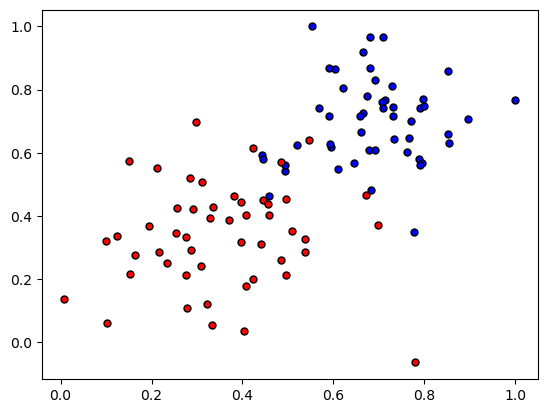

In [60]:
# Obtengo x e y

X = np.array(data[[0,1]])  # defino x1, x2
y = np.array(data[2])  # defino y

print(X)
print(y)

# Mostramos el grafico
plot_points(X,y)
plt.show()

In [61]:
# Implementar las ecuaciones de Gradiente Descendiente

# Funcion sigmoidal
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Aplicar la sigmoide a w1x1 + w2x2 + b -> wx + b --> sigmoid(wx + b), porque estamos en una funcion continua
def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)  # Esta salida es el y_sombrero

# Error
def error_formula(y, output):  # Y_sombrero es output
    return - y*np.log(output) - (1 - y) * np.log(1-output)

# Actualizar pesos
def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x, weights, bias)
    d_error = y - output
    weights += learnrate * d_error * x
    bias += learnrate * d_error
    return weights, bias


In [62]:
# Entrenamiento

np.random.seed(44)

epochs = 200
learnrate = 0.1

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = [] # alamacenar el error
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)  # y vs y_sombrero
            weights, bias = update_weights(x, y, weights, bias, learnrate)
                   
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()


========== Epoch 0 ==========
Train loss:  0.8439826187768366
Accuracy:  0.5

========== Epoch 20 ==========
Train loss:  0.2779379803830507
Accuracy:  0.91

========== Epoch 40 ==========
Train loss:  0.20742670017698334
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.18210692488755814
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.16919340796337184
Accuracy:  0.93

========== Epoch 100 ==========
Train loss:  0.16142489939955446
Accuracy:  0.93

========== Epoch 120 ==========
Train loss:  0.1562791930655828
Accuracy:  0.94

========== Epoch 140 ==========
Train loss:  0.15264845954235434
Accuracy:  0.94

========== Epoch 160 ==========
Train loss:  0.1499695816194505
Accuracy:  0.94

========== Epoch 180 ==========
Train loss:  0.14792612230177185
Accuracy:  0.94


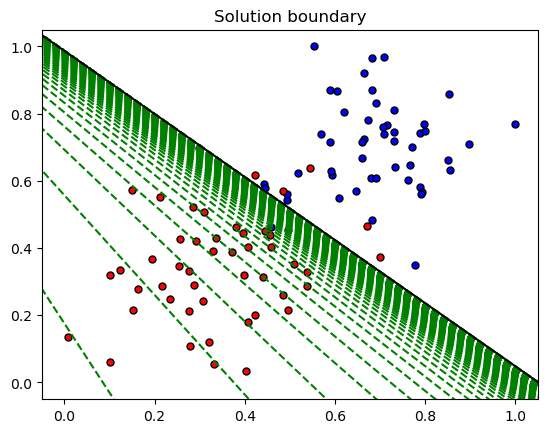

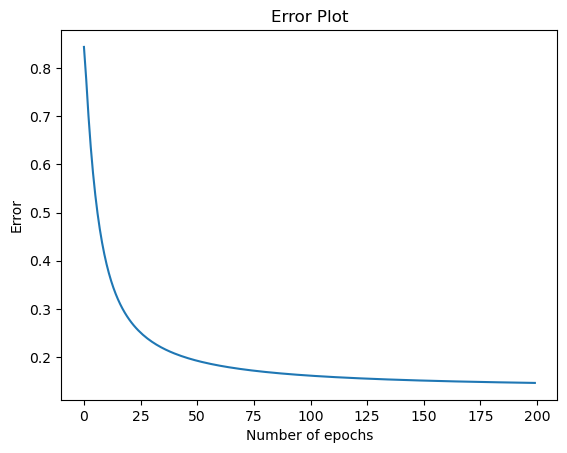

In [63]:
train(X, y, epochs, learnrate, True)